In [1]:
# autoreload modules when files have been altered
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os, gc
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
font = {'family' : 'serif', 'weight':'normal',
        'size'   : 30}
matplotlib.rc('font', **font)


# Create New
New database for information.

In [4]:
from seestar import createNew
createNew.create()
# When requested , give the database a path
# Provide a name for the database 
# (I've used GaiaRVS here and for the rest of this notebook but you can change that.)

Where is the directory? /media/andy/37E3-0F91/Research/SF/SFdata
What survey? (will be used to label the folder and file contents) GaiaRVS
Style of survey? a = multi-fibre fields, b = all-sky: b

The files for the project have been generated.
They are located here: /media/andy/37E3-0F91/Research/SF/SFdata/GaiaRVS
Photometric files are in the subfolder: /media/andy/37E3-0F91/Research/SF/SFdata/GaiaRVS/photometric
Example csv files have been generated for you with the correct column headings.



'/media/andy/37E3-0F91/Research/SF/SFdata/GaiaRVS/GaiaRVS_fileinfo.pickle'

# fileinfo

In [9]:
from seestar import surveyInfoPickler

In [10]:
# Location of fileinfo file - replace teh fileinfo_path string
fileinfo_path = '/media/andy/37E3-0F91/Research/SF/SFdata/GaiaRVS/GaiaRVS_fileinfo.pickle'
fileinfo = surveyInfoPickler.surveyInformation(fileinfo_path)

In [12]:
# Test for any problems in the
fileinfo.testFiles()
# Good to come back to this whenever you move files around or change things.

1) Checking file paths exist:
OK

2) Checking spectroscopic catalogue file structure:
OK

3) Checking field information file structure:
OK

4) Checking photometric catalogue file structure:
Checking 98.csv:
photo_path angle range not correct. Should be -pi/2<=theta<=pi/2, 0<=pi<=2pi. Data gives nan<=theta=<nan, nan<=phi<=nan.

5) Checking selection function pickle paths exist:
The path to your selection function pickled instance, sf_pickle_path, does not exist: /media/andy/37E3-0F91/Research/SF/SFdata/GaiaRVS/GaiaRVS_SF.pickle
The path to your selection function pickled instance, obsSF_pickle_path, does not exist: /media/andy/37E3-0F91/Research/SF/SFdata/GaiaRVS/GaiaRVS_obsSF.pickle
^ These files should exist for an already made selection function. If you're starting from scratch, ignore this!

6) Checking isochrone pickle files exist:
The path to isochrone data, iso_interp_path, does not exist: /media/andy/37E3-0F91/Research/SF/SFdata/GaiaRVS/isochrones/isochrone_interpolantinstances.

In [42]:
# Joins some of the given folders and filenames together to create full paths
fileinfo()
# Some changes will be saved automatically if you run testFiles then save. 
fileinfo.save()

# Spectroscopic RVS data

In [22]:
from seestar import AngleDisks

In [23]:
# Columns to use
cols_small = ['source_id', 'ra', 'dec', 'parallax', 'pmra', 'pmdec',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
       'radial_velocity',
       'tmass_j_m', 'tmass_h_m', 'tmass_ks_m']

cols_big = ['source_id', 'ref_epoch', 'ra', 'dec', 'parallax', 'pmra', 'pmdec',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
       'radial_velocity',
       'priam_flags', 
       'teff_val','a_g_val', 'e_bp_min_rp_val',
       'flame_flags', 'radius_val','lum_val',
       'tmass_oid', 'tmass_ra', 'tmass_dec',
       'tmass_j_m', 'tmass_j_msigmcom', 'tmass_h_m', 'tmass_h_msigmcom',
       'tmass_ks_m', 'tmass_ks_msigmcom']

In [24]:
# Load in dataframe (This is the data which you sent me)
df = pd.read_csv('/media/andy/37E3-0F91/Research/SF/SFdata/GaiaDR2FirstMillion.csv', usecols=cols_small)

In [25]:
# Change coordinates
df.dec *= np.pi/180
df.ra *= np.pi/180
df['glon'], df['glat'] = AngleDisks.EquatToGal(df.ra, df.dec)

# Relable magnitudes
coords_old = ['tmass_j_m', 'tmass_h_m', 'tmass_ks_m']
coords_new = ['Japp', 'Happ', 'Kapp']
df.rename(index=str, columns=dict(zip(coords_old, coords_new)), inplace=True)

In [26]:
# Full Gaia df and RVS subsample
rvs = df[~np.isnan(df.radial_velocity)]

len(df), len(rvs), float(len(rvs))/len(df)

(1000000, 24235, 0.024235)

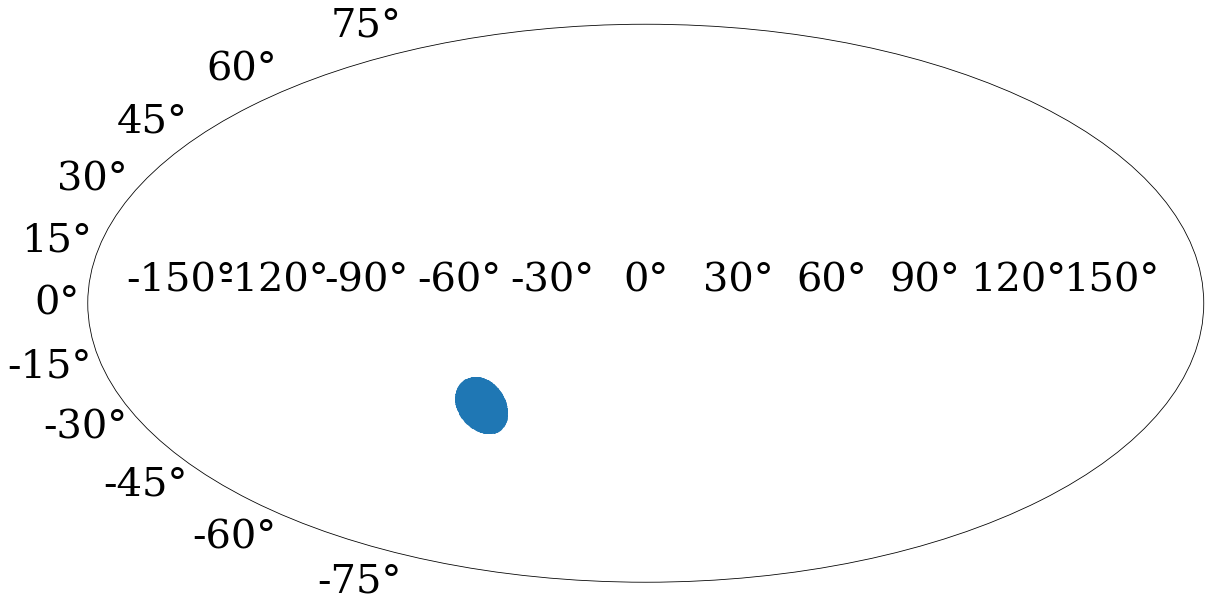

In [29]:
# Plot scatter of stars on sky to check it's as expected - We only get a small region for this subsample
fig = plt.figure(figsize=(20,20))

l = rvs.glon.copy()
l[l>np.pi] -= 2*np.pi
b = rvs.glat.copy()
plt.subplot(projection='mollweide')
plt.scatter(l, b, s=1)

In [31]:
rvs.to_csv(fileinfo.spectro_path, index=False)

# Assign Fields - HEALPix pixels

In [3]:
from seestar import FieldAssignment

In [6]:
sys.path.append('/home/andy/Documents/Research/SF/GitRepo/seestar/')
import FieldAssignment

In [4]:
fileinfo_path = '/media/andy/37E3-0F91/Research/SF/SFdata/GaiaRVS/GaiaRVS_fileinfo.pickle'

files = [str(i*10)+"_"+str((i+1)*10) for i in range(24)]
files.extend([str(i*5)+"_"+str((i+1)*5) for i in range(24*2, 30*2)])
files.extend([str(i*10)+"_"+str((i+1)*10) for i in range(30, 36)])
files = ['/media/andy/UUI/Research/SF/SFdata/2MASS/2MASSgalactic/2MASS_'+filen+'.csv.gz' for filen in files]

Checking photometric catalogue file structure:
Checking /media/andy/UUI/Research/SF/SFdata/2MASS/2MASSgalactic/2MASS_30_40.csv.gz:
File OK

108 pixels being used (nside = 3). Excellent choice :D


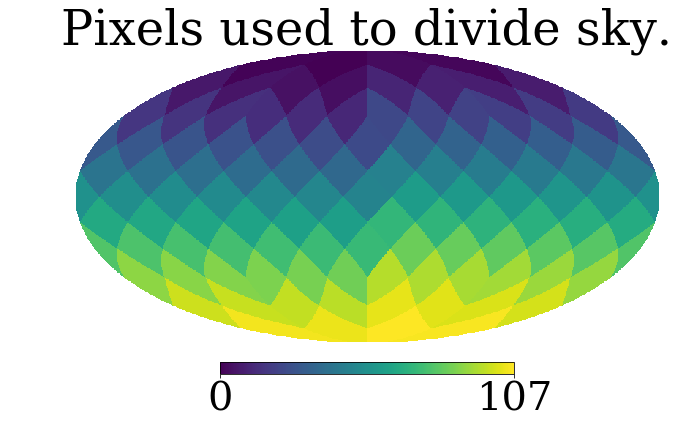

Does the survey provide Hband magnitude and J-K colour bounds? (y/n)n
Clearing field files...
...done

File: /media/andy/37E3-0F91/Research/SF/SFdata/GaiaRVS/photometric/107.csv  Complete: 469836760/470000000(99.965%)  Time: 48.6m  Projected: 0h48m...fieldID: 107...fieldID: 107      

In [7]:
fa = FieldAssignment.HealpixAssignment(fileinfo_path, files, npixel=108, ncores=1, starTotal=470000000)
# If npixel does not correspond to a healpix value, it will ask you to chose another
# npixel = 12*nside**2 where nside is an integer.

Checking photometric catalogue file structure:
Checking /media/andy/UUI/Research/SF/SFdata/2MASS/2MASSgalactic/2MASS_0_10.csv.gz:
File OK

108 pixels being used (nside = 3). Excellent choice :D


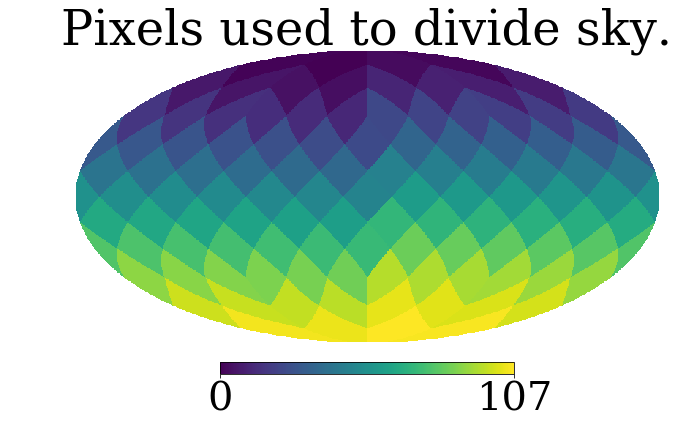

Does the survey provide Hband magnitude and J-K colour bounds? (y/n)n
Clearing field files......done

File: 2MASS_10_20.csv.gz  Complete: 9184601/470000000(1.954%)  Time: 1.3m  Projected: 1h4m...fieldID: 107...fieldID: 107      

In [9]:
fa = FieldAssignment.HealpixAssignment(fileinfo_path, files[:2], npixel=108, ncores=1, starTotal=470000000)
# If npixel does not correspond to a healpix value, it will ask you to chose another
# npixel = 12*nside**2 where nside is an integer.

# Use ncores=1 because there's a bug in the multiprocessing which I'm struggling to fix